 Dataset Loading

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
vocab_size = 10000  # Use the top 10,000 most common words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Inspect the dataset
print(f"Training samples: {len(x_train)}, Testing samples: {len(x_test)}")
print(f"First review (encoded): {x_train[0]}")
print(f"First review label: {y_train[0]}")

Training samples: 25000, Testing samples: 25000
First review (encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 1

Data Exploration

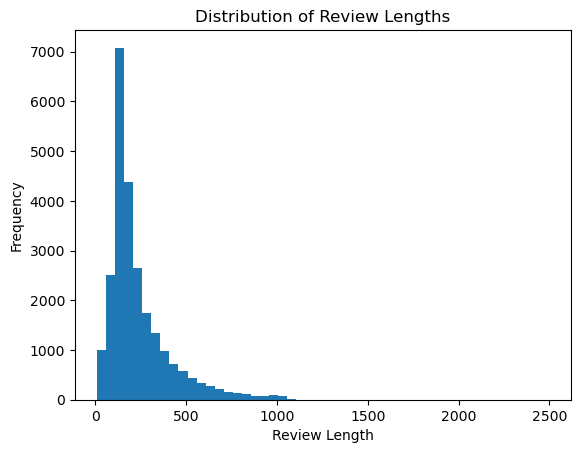

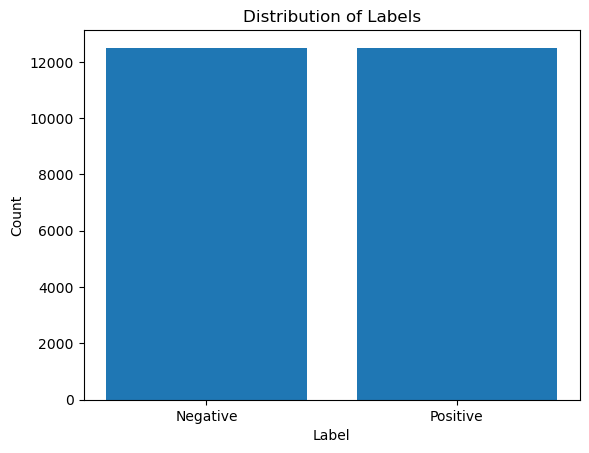

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Distribution of review lengths
review_lengths = [len(review) for review in x_train]
plt.hist(review_lengths, bins=50)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

# Distribution of labels
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

 Text Preprocessing

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences
max_length = 500
x_train_padded = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test_padded = pad_sequences(x_test, maxlen=max_length, padding='post')

# Optionally, decode a few reviews back to text for better understanding
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

print(f"Decoded review: {decode_review(x_train[0])}")

Decoded review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have do

Build the LSTM Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define vocabulary size and sequence length
vocab_size = 10000  # Example value
max_length = 100  # Example input length

model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
# Build the model manually (optional but useful)
model.build(input_shape=(None, max_length))

model.summary()

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,461,057 (5.57 MB)

 Trainable params: 1,461,057 (5.57 MB)

 Non-trainable params: 0 (0.00 B)

 Train the Model

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_padded, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test_padded, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 903s 2s/step - accuracy: 0.5059 - loss: 0.6941 - val_accuracy: 0.5004 - val_loss: 0.6924
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1050s 3s/step - accuracy: 0.5089 - loss: 0.6905 - val_accuracy: 0.5096 - val_loss: 0.6894
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1436s 4s/step - accuracy: 0.5256 - loss: 0.6759 - val_accuracy: 0.5163 - val_loss: 0.6898
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1251s 3s/step - accuracy: 0.5418 - loss: 0.6584 - val_accuracy: 0.5155 - val_loss: 0.7010
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 897s 2s/step - accuracy: 0.5372 - loss: 0.6394 - val_accuracy: 0.5150 - val_loss: 0.7183
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 943s 2s/step - accuracy: 0.5443 - loss: 0.6373 - val_accuracy: 0.5031 - val_loss: 0.7165
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1129s 3s/step - accuracy: 0.5395 - loss: 0.6475 - val_accuracy: 0.5179 - val_loss: 0.7230
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1247s 3s/step - accuracy: 0.5484 - loss: 0.6330 - val

In [30]:
 # Saves the model after training
model.save('sentiment_model.keras', include_optimizer=False) 

 Evaluate the Model

782/782 ━━━━━━━━━━━━━━━━━━━━ 265s 339ms/step
Accuracy: 0.83
Precision: 0.77
Recall: 0.92
F1 Score: 0.84


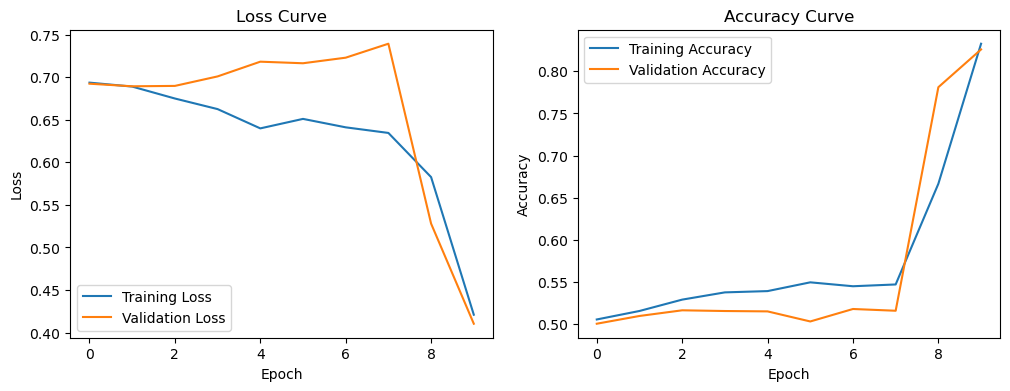

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
y_pred = (model.predict(x_test_padded) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

 Make Predictions

In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import tokenizer_from_json
from tabulate import tabulate
import json

# Load IMDb dataset
vocab_size = 10000  # Adjust based on your model
max_length = 200    # Adjust based on your model
word_index = imdb.get_word_index()  # Word index mapping

# Reverse word index to get words from encoded reviews
reverse_word_index = {value: key for key, value in word_index.items()}

# Load test data from IMDb
(_, _), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Function to decode review (convert numbers back to words)
def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i, "<?>") for i in encoded_review[:20]]) + "..."  # Display first 20 words

# Function to preprocess IMDb review
def preprocess_review(review):
    padded_review = pad_sequences([review], maxlen=max_length, padding='post')
    return padded_review

# Load your trained model
model = tf.keras.models.load_model("sentiment_model.keras", compile=False)

# Predict sentiment for test reviews and display results in a table
num_samples = 5  # Number of test samples to evaluate
results = []

for i in range(num_samples):
    processed_review = preprocess_review(X_test[i])
    prediction = model.predict(processed_review)[0][0]
    
    # Determine sentiment
    sentiment = "😊 Positive" if prediction > 0.5 else "😞 Negative"
    confidence = prediction if prediction > 0.5 else (1 - prediction)

    # Store result in table format
    results.append([i + 1, decode_review(X_test[i]), sentiment, f"{confidence:.2%}"])

# Print results as a table
print("\n📢 **Sentiment Analysis Results** 📢\n")
print(tabulate(results, headers=["Review #", "Sample Review", "Sentiment", "Confidence Score"], tablefmt="fancy_grid"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step

📢 **Sentiment Analysis Results** 📢

╒════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════════╤════════════════════╕
│   Review # │ Sample Review                                                                                             │ Sentiment   │ Confidence Score   │
╞════════════╪═══════════════════════════════════════════════════════════════════════════════════════════════════════════╪═════════════╪════════════════════╡
│          1 │ the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring...        │ 😞 Negative │ 84.38%             │
├────────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────┼─────────────┼────